In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [620]:
L = 20

x = np.arange(0,L,1,dtype=int)
y = np.arange(0,L,1,dtype=int)
xv,yv = np.meshgrid(x,y)
x=x[1:L-1]
y=y[1:L-1]

U = np.random.rand(L,L)
W = np.random.rand(L,L)
T = np.random.rand(L,L)


b = np.ones(T.shape,dtype=bool)
b[1:-1,1:-1] = 0
c =~b

bcT = np.zeros(T.shape)
bcT[0,:] = 10

bcU = np.zeros(U.shape)
bcU[0,:] = 1

bcW = np.zeros(W.shape)
bcW[0,:] = 1

T[b]=bcT[b]
U[b]=bcU[b]
W[b]=bcW[b]


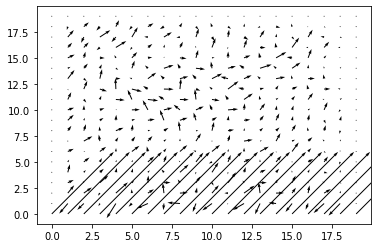

In [621]:
E1,E2 = 10,10
while E1 > 10**(-6) and E2 > 10**(-6):
    for xi in x:
        for yi in y:
            E1 = U[xi,yi]
            E2 = W[xi,yi]
            
            A = 1
            B = 4 + U[xi+1,yi] - W[xi,yi]
            C = U[xi+1,yi]+U[xi,yi+1]+U[xi-1,yi]+U[xi,yi-1]-U[xi+1,yi]*W[xi,yi]
            r = np.roots([A,B,C])
            U[xi,yi] = r[np.argmin(np.abs(r-U[xi,yi]))]
            
            A = 1
            B = 4 + W[xi+1,yi] - U[xi,yi]
            C = W[xi+1,yi]+W[xi,yi+1]+W[xi-1,yi]+W[xi,yi-1]-W[xi+1,yi]*U[xi,yi]
            r = np.roots([A,B,C])
            W[xi,yi] = r[np.argmin(np.abs(r-W[xi,yi]))]
            
            E1 = E1-U[xi,yi]
            E2 = E2-W[xi,yi]

norm = np.max(np.sqrt(U**2+W**2))
U,W = U/norm,W/norm
plt.quiver(xv,yv,U/norm,W/norm)

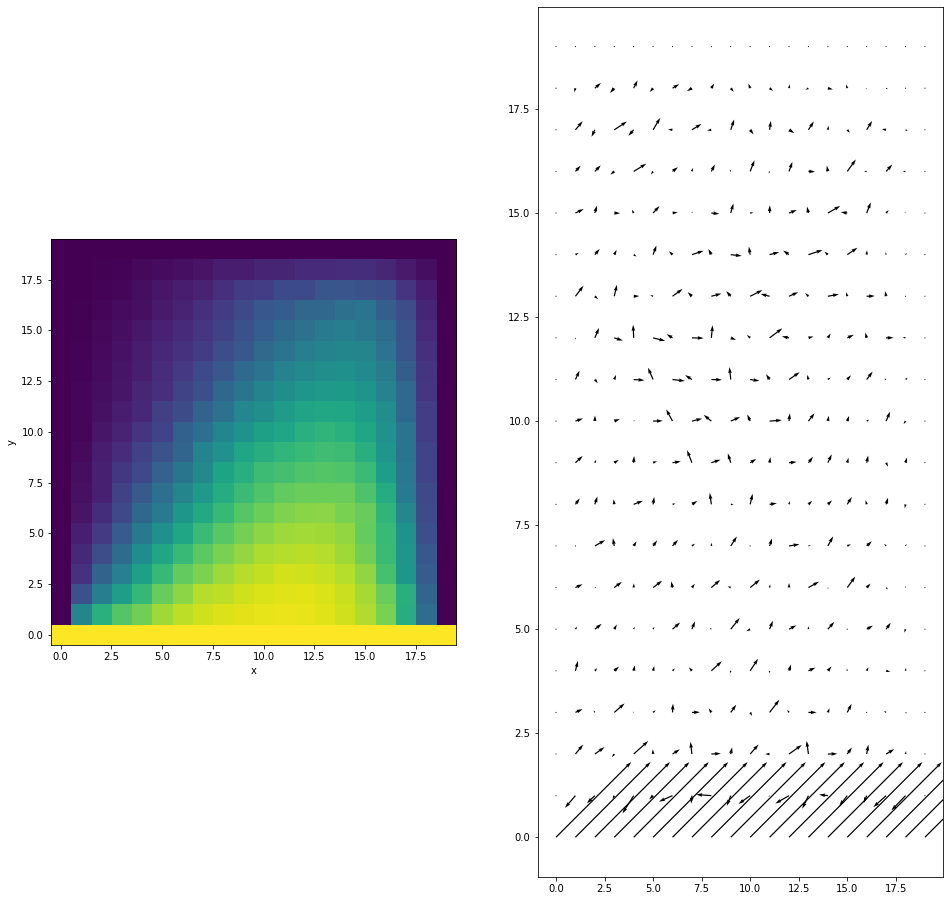

In [625]:
E = 10
T = np.random.rand(L,L)
bcT = np.zeros(T.shape)
bcT[0,:] = 1
T[b]=bcT[b]

while E > 10**(-6):
    for xi in x:
        for yi in y:
            E = T[xi,yi]
            vx=U[xi,yi]*10
            vy=W[xi,yi]*10
            
            T[xi,yi] = (T[xi+1,yi]+T[xi,yi+1]+T[xi-1,yi]+T[xi,yi-1]-vy*T[xi+1,yi]-vx*T[xi,yi+1])/(4-vx-vy)
            E = E-T[xi,yi]
            
plt.figure(figsize = (16,16))
plt.subplot(121)
plt.imshow(T)
plt.gca().invert_yaxis()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.quiver(xv,yv,U,W)

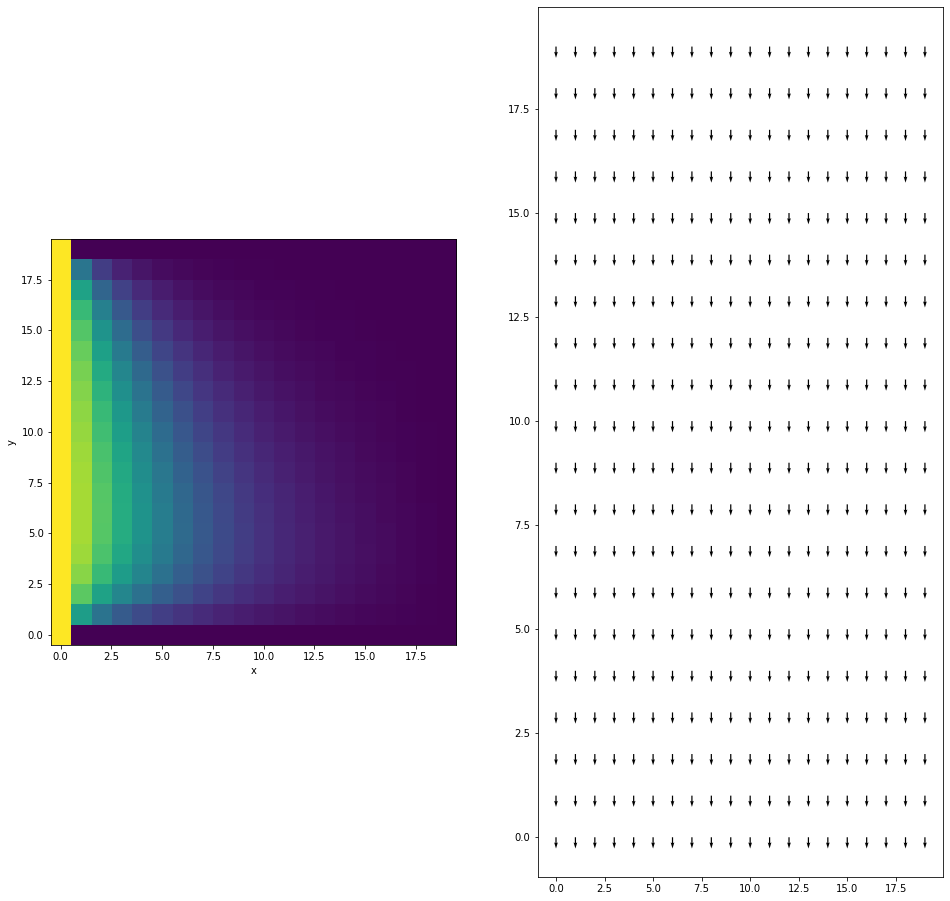

In [598]:
T = np.random.rand(L,L)
bcT = np.zeros(T.shape)
bcT[0,:] = 0
bcT[:,0] = 1
T[b]=bcT[b]

E = 10
while E > 10**(-6):
    for xi in x:
        for yi in y:
            E = T[xi,yi]
            vx=0
            vy=-0.5
            
            T[xi,yi] = (T[xi+1,yi]+T[xi,yi+1]+T[xi-1,yi]+T[xi,yi-1]-vy*T[xi+1,yi]-vx*T[xi,yi+1])/(4-vx-vy)
            E = E-T[xi,yi]

plt.figure(figsize = (16,16))
plt.subplot(121)
plt.imshow(T)
plt.gca().invert_yaxis()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.quiver(xv,np.flip(yv),vx*np.ones(T.shape),vy*np.ones(T.shape))
